In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

# Tạo thư mục kaggle và chép file config vào
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Tạo thư mục đích nếu chưa có
!kaggle datasets download -d immulu/bigearthnetv2-reference-maps

!mkdir -p ./lable_metadata

# Giải nén chỉ 1 file: metadata.parquet
!unzip bigearthnetv2-reference-maps.zip "metadata.parquet" -d ./lable_metadata

Dataset URL: https://www.kaggle.com/datasets/immulu/bigearthnetv2-reference-maps
License(s): Community Data License Agreement - Permissive - Version 1.0
 99% 648M/651M [00:00<00:00, 1.34GB/s]
100% 651M/651M [00:00<00:00, 1.34GB/s]
Archive:  bigearthnetv2-reference-maps.zip
  inflating: ./lable_metadata/metadata.parquet  


In [ ]:
!unzip "/content/drive/MyDrive/Document for Capstone/bigearthnet_12band_10m.zip" -d /content/

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_41_60_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_85_77_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_24_70_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_78_86_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND_14_53_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170704T112111_N9999_R037_T29SND/S2A_MSIL2A_20170704T112111_N9999_R0

In [ ]:
!unzip "/content/drive/MyDrive/Document for Capstone/bigearthnet_12band_10m_1.zip" -d /content/

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_35_31_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_64_20_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_15_73_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_20_25_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_64_81_12band.tif  
  inflating: /content/content/bigearthnet_12band_10m_1/S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK/S2A_MSIL2A_20171101T094

In [ ]:
# Di chuyển toàn bộ nội dung từ bigearthnet_12band_10m_1 vào bigearthnet_12band_10m
!mv /content/content/bigearthnet_12band_10m_1/* /content/content/bigearthnet_12band_10m/

# (Tuỳ chọn) Xoá thư mục rỗng bigearthnet_12band_10m_1
!rmdir /content/content/bigearthnet_12band_10m_1

In [ ]:
# !ls -d content/
# check tên
# /content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP/S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_26_57_12band.tif

In [ ]:
import pandas as pd

# Đường dẫn đến file metadata.parquet đã giải nén
parquet_path = './lable_metadata/metadata.parquet'

# Đọc file parquet
df = pd.read_parquet(parquet_path)

print(df.columns)

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow'],
      dtype='object')


In [ ]:
df["labels"][15]

array(['Arable land', 'Broad-leaved forest', 'Inland waters', 'Pastures',
       'Urban fabric'], dtype=object)

In [ ]:
from collections import Counter
from itertools import chain

# Chuỗi các nhãn được gộp thành 1 danh sách lớn (flattened list)
all_labels = list(chain.from_iterable(df['labels']))

# Đếm tần suất xuất hiện của từng nhãn
label_counts = Counter(all_labels)

# In ra số nhãn duy nhất
print("Số lượng nhãn duy nhất:", len(label_counts))

# In ra danh sách và số lần xuất hiện
print("\nTần suất xuất hiện của từng nhãn:")
for label, count in label_counts.most_common():
    print(f"{label:40s}: {count}")


Số lượng nhãn duy nhất: 19

Tần suất xuất hiện của từng nhãn:
Arable land                             : 188025
Mixed forest                            : 165780
Coniferous forest                       : 154941
Transitional woodland, shrub            : 141150
Broad-leaved forest                     : 135928
Land principally occupied by agriculture, with significant areas of natural vegetation: 122709
Complex cultivation patterns            : 99598
Pastures                                : 95605
Urban fabric                            : 63758
Inland waters                           : 63212
Marine waters                           : 61832
Agro-forestry areas                     : 33181
Permanent crops                         : 29588
Inland wetlands                         : 20919
Moors, heathland and sclerophyllous vegetation: 13894
Natural grassland and sparsely vegetated areas: 11882
Industrial or commercial units          : 11142
Coastal wetlands                        : 1397
Beaches, du

In [ ]:
import pandas as pd
import numpy as np

# Đọc file metadata.parquet
parquet_path = './lable_metadata/metadata.parquet'
df = pd.read_parquet(parquet_path)

# Danh sách 19 lớp chuẩn
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Tạo ánh xạ từ tên nhãn sang chỉ số
label_to_idx = {label: i for i, label in enumerate(class_list)}

# Hàm chuyển danh sách nhãn thành vector 19 chiều
def encode_labels(label_list):
    vec = np.zeros(len(class_list), dtype=int)
    for label in label_list:
        if label in label_to_idx:
            vec[label_to_idx[label]] = 1
    return vec.tolist()

# Ghi đè cột 'labels' bằng vector 19 chiều (multi-hot)
df['labels'] = df['labels'].apply(encode_labels)

# Kiểm tra kết quả
print(df.head())

# (Tùy chọn) Lưu lại file parquet hoặc CSV
df.to_parquet('metadata_multilabel_encoded.parquet')


                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
import os

# Đường dẫn thư mục chứa ảnh đa phổ đã xử lý
data_dir = "/content/content/bigearthnet_12band_10m"

class_counts = {}
total_images = 0

for label in sorted(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, label)
    if os.path.isdir(class_path):
        n_files = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
        class_counts[label] = n_files
        total_images += n_files

# In kết quả
print("Số lượng ảnh mỗi class:")
for label, count in class_counts.items():
    print(f"Class {label}: {count} ảnh")

print(f"\nTổng số ảnh: {total_images}")

Số lượng ảnh mỗi class:
Class S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP: 3305 ảnh
Class S2A_MSIL2A_20170613T101031_N9999_R022_T34VER: 6686 ảnh
Class S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU: 7986 ảnh
Class S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK: 7997 ảnh
Class S2A_MSIL2A_20170704T112111_N9999_R037_T29SND: 8216 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA: 370 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV: 6013 ảnh
Class S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG: 1540 ảnh
Class S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC: 8222 ảnh
Class S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT: 4888 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL: 8229 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN: 2292 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS: 627 ảnh
Class S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB: 8165 ảnh
Cl

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
!pip install rasterio

Shape của ảnh S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV_21_63_12band.tif: (12, 120, 120) (channels, height, width)


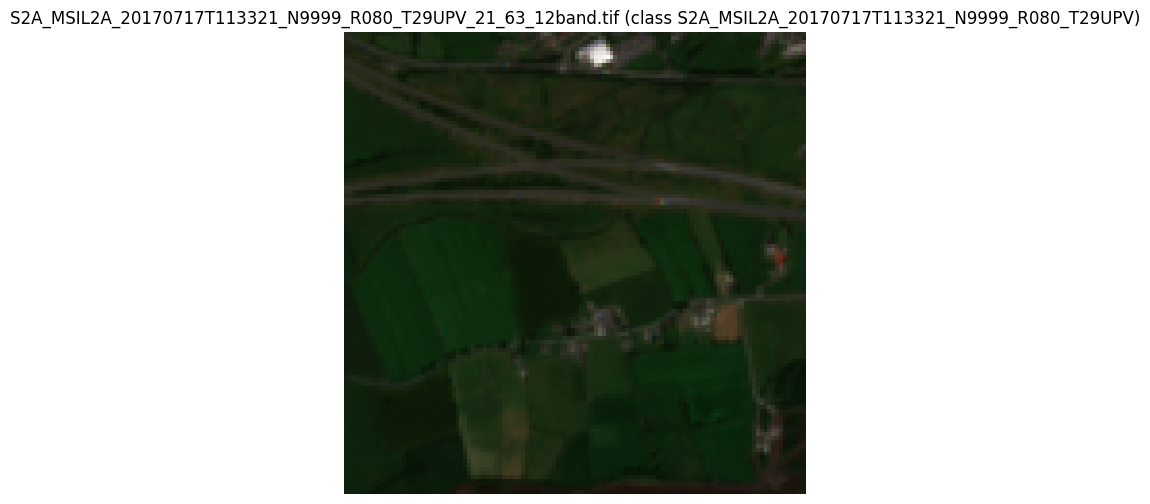

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import random

# Chọn ngẫu nhiên 1 class và 1 ảnh trong class
random_class = random.choice(os.listdir(data_dir))
img_path = os.path.join(data_dir, random_class)
random_img = random.choice([f for f in os.listdir(img_path) if f.endswith('.tif')])
img_full_path = os.path.join(img_path, random_img)

# Đọc ảnh
with rasterio.open(img_full_path) as src:
    img = src.read()  # shape: (12, H, W)

# In shape
print(f"Shape của ảnh {random_img}: {img.shape} (channels, height, width)")

# Hiển thị ảnh (dùng band 4,3,2 tương ứng RGB)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # Chú ý chỉ số bắt đầu từ 0
rgb = rgb.astype(np.float32)
rgb /= np.max(rgb) + 1e-6  # Chuẩn hóa để hiển thị

plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"{random_img} (class {random_class})")
plt.axis('off')
plt.show()


In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# 1. Đường dẫn gốc chứa các thư mục con
IMAGE_DIR = "/content/content/bigearthnet_12band_10m"

# 2. Đọc metadata chứa patch_id và labels
# df = pd.read_parquet("./lable_metadata/metadata.parquet")

# 3. Duyệt toàn bộ ảnh trong thư mục con, tạo ánh xạ patch_id → đường dẫn ảnh
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

patch_to_path = {
    os.path.basename(path).replace("_12band.tif", ""): path
    for path in tif_paths
}

# 4. Giữ lại các patch_id có ảnh thật sự
df = df[df['patch_id'].isin(patch_to_path)]

# 5. Gán cột image_path theo ánh xạ tìm được
df['image_path'] = df['patch_id'].map(patch_to_path)

# 6. Chia ngẫu nhiên train/val/test (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# 7. Tạo danh sách (image_path, labels)
train_list = list(zip(train_df['image_path'], train_df['labels']))
val_list = list(zip(val_df['image_path'], val_df['labels']))
test_list = list(zip(test_df['image_path'], test_df['labels']))

# 8. In kết quả
print(f"Số ảnh train: {len(train_list)}")
print(f"Số ảnh val:   {len(val_list)}")
print(f"Số ảnh test:  {len(test_list)}")

df.head()

Số ảnh train: 71741
Số ảnh val:   15377
Số ảnh test:  15374


patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57   
4  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58   

                          s2v1_name  contains_seasonal_snow  \
0  S2A_MSIL2A_20170613T101031_26_57                   False   
1  S2A_MSIL2A_20170613T101031_27_55                   False   
2  S2A_MSIL2A_20170613T101031_27_56                   False   
3  S2A_MSIL2A_20170613T101031_27_57                   False   
4  S2A_MSIL2A_20170613T101031_27_58                   False   

   contains_cloud_or_shadow                                         image_path  
0                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
1                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
2                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
3                     False  /content/content/bigearthnet_12band_10m/S2A_MS...  
4                     False  /content/content/bigearthnet_12band_10m/S2A_MS...

In [ ]:
train_list[0]

('/content/content/bigearthnet_12band_10m/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_64_29_12band.tif',
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Kiểm tra những ảnh KHÔNG có trong metadata
tif_patch_ids = set([os.path.basename(p).replace('_12band.tif', '') for p in tif_paths])
metadata_patch_ids = set(df['patch_id'].tolist())

missing_from_metadata = tif_patch_ids - metadata_patch_ids
print(f"Số ảnh KHÔNG có metadata: {len(missing_from_metadata)}")


Số ảnh KHÔNG có metadata: 9718


In [ ]:
# Số ảnh thực sự trong thư mục
print("Tổng số file ảnh .tif:", len(tif_paths))

# Số patch_id có metadata
print("Tổng số patch_id trong metadata:", len(df))

# Số ảnh tồn tại đồng thời cả trong thư mục và metadata
common_ids = set(df['patch_id']).intersection(set(patch_to_path))
print("Số patch_id khớp được cả metadata và ảnh:", len(common_ids))


Tổng số file ảnh .tif: 112210
Tổng số patch_id trong metadata: 102492
Số patch_id khớp được cả metadata và ảnh: 102492


In [ ]:
import os
from glob import glob

# 1. Đường dẫn thư mục ảnh
IMAGE_DIR = "/content/content/bigearthnet_12band_10m"

# 2. Lấy tất cả file .tif (ảnh 12 band) trong mọi thư mục con
tif_paths = glob(os.path.join(IMAGE_DIR, "*", "*_12band.tif"))

# 3. Lấy patch_id từ tên file
tif_patch_ids = set(os.path.basename(p).replace('_12band.tif', '') for p in tif_paths)

# 4. Lấy patch_id từ metadata
import pandas as pd
df = pd.read_parquet("./lable_metadata/metadata.parquet")
metadata_patch_ids = set(df['patch_id'].tolist())

# 5. Tìm ảnh bị thiếu trong metadata
missing_patch_ids = tif_patch_ids - metadata_patch_ids

# 6. In số lượng và một vài ví dụ
print(f"Số ảnh .tif không có metadata: {len(missing_patch_ids)}")
print("Ví dụ các ảnh bị thiếu:")
for pid in list(missing_patch_ids)[:10]:
    print(f"- {pid}_12band.tif")


Số ảnh .tif không có metadata: 9718
Ví dụ các ảnh bị thiếu:
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_01_49_12band.tif
- S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU_50_90_12band.tif
- S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_49_77_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_70_09_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_73_06_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ_29_16_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_09_38_12band.tif
- S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL_90_74_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_17_51_12band.tif
- S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK_18_36_12band.tif


In [ ]:
import pandas as pd

# Đọc metadata
df = pd.read_parquet('./lable_metadata/metadata.parquet')

# Patch cần kiểm tra
patch_id = "S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK_69_71"

# Kiểm tra tồn tại
exists = patch_id in df['patch_id'].values
print(f"Tồn tại trong metadata: {'Có' if exists else 'Không'}")


Tồn tại trong metadata: Không


In [ ]:
!pip install albumentations

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    # A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),

    A.Resize(224, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=False)
])


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from torch.utils.data import Dataset
import torch
import tifffile as tiff

class BigEarthNetDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]

        with rasterio.open(img_path) as src:
            image = src.read()  # (12, H, W)

        image = image.astype(np.float32) / 10000.0
        image = np.transpose(image, (1, 2, 0))  # (H, W, C) cho Albumentations

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        else:
            image = torch.tensor(np.transpose(image, (2, 0, 1)))  # (C, H, W)

        label = np.array(label, dtype=np.float32)  # ép kiểu numeric
        label = torch.tensor(label, dtype=torch.float32)

        return image, label


In [ ]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 64

# Dataset
train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
test_dataset = BigEarthNetDataset(test_list, transform=val_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
train_dataset[0][1].shape

torch.Size([19])

Label Tensor: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: 10
Non-zero class count: 1.0


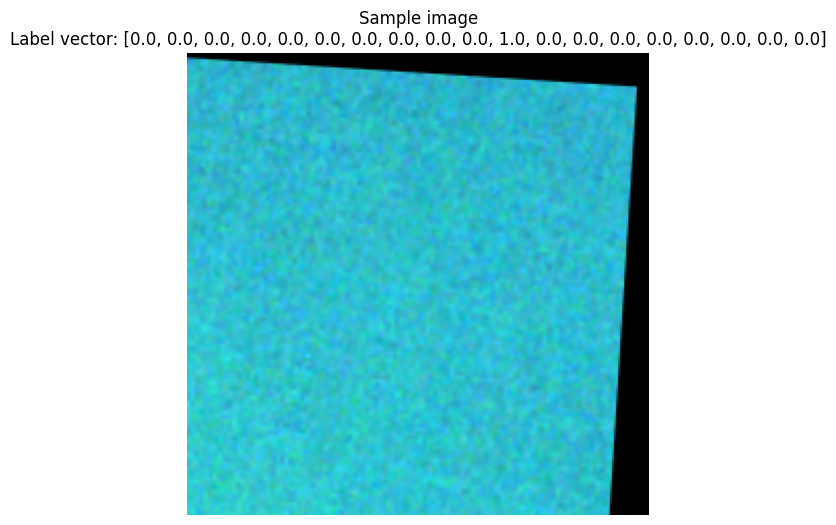

In [ ]:
# Lấy 1 mẫu bất kỳ từ train_dataset
sample_img, sample_label = train_dataset[5]

# Kiểm tra thông tin label
print("Label Tensor:", sample_label)
print("Shape:", sample_label.shape)
print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
print("Non-zero class count:", torch.sum(sample_label).item())

# Chuyển tensor về numpy để hiển thị
sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)

# Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
rgb = sample_img_np[:, :, [3, 2, 1]]

# Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)

# Hiển thị ảnh
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
plt.axis("off")
plt.show()


In [ ]:
!pip install timm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Luôn dùng CPU
device = torch.device("cpu")
print(" Using device:", device)

# Load model ViT đã huấn luyện (trên CPU)
# model_path = "/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth"
model_path = "/content/drive/MyDrive/Document for Capstone/Model/my_pytorch_model_bigearth_1.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)
print(model.head)

random_image = torch.rand((12, 224, 224), dtype=torch.float32)

with torch.no_grad():
    output = model(random_image.unsqueeze(0))
    predicted = (output.squeeze() > 0.5).cpu().numpy()  # Threshold 0.5 để multi-label

# print("Predicted Labels (binary vector):\n", predicted)
print("Output sigmoid:\n", output.squeeze().cpu().numpy())
print("Predicted Labels:\n", predicted)

⚡ Using device: cpu
Model loaded and moved to cpu
Sequential(
  (0): Linear(in_features=768, out_features=19, bias=True)
  (1): Sigmoid()
)
Output sigmoid:
 [6.23352069e-04 3.25072411e-04 4.63762553e-04 7.74357643e-04
 3.25475237e-04 3.21533094e-04 2.80036300e-04 1.48315856e-04
 2.08679834e-04 4.00985731e-03 9.94355679e-01 8.83993853e-05
 1.18769516e-04 1.21410536e-04 1.16662966e-04 3.10499636e-05
 1.09865774e-04 3.21112057e-05 1.79644576e-05]
Predicted Labels:
 [False False False False False False False False False False  True False
 False False False False False False False]


SHAP

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.5 MB/s eta 0:00:00


chạy riêng giải thích 12 bands cho từng class (kh for)

In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
#  Chọn device: ưu tiên GPU nếu có
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 5  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = self.base_model(x)
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

#  Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

#  Số lượng ảnh muốn explain
num_explain = 1000

print(f" Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f" Found at index {idx} (prob={prob:.3f})")

    #  Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f" Đã tìm đủ {num_explain} ảnh.")
        break

# Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    # raise ValueError(f" Chỉ tìm được {len(predicted_indices)} ảnh, không đủ {num_explain} để explain.")
    print(f" Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")

# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

#  Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.

Ảnh 287:
  True labels:     [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [0.705 0.953 0.941 0.472 0.014 0.739 0.002 0.002 0.028 0.01  0.005 0.
 0.001 0.027 0.    0.    0.008 0.015 0.   ]
  Predicted labels: [1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
  Class 5 probability: 0.7386

Ảnh 288:
  True labels:     [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
  Predicted probs: [0.531 0.083 0.059 0.639 0.655 0.518 0.885 0.082 0.196 0.002 0.001 0.205
 0.663 0.001 0.048 0.267 0.451 0.007 0.004]
  Predicted labels: [1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0]
  Class 5 probability: 0.5180

Ảnh 289:
  True labels:     [1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [0.806 0.875 0.987 0.498 0.012 0.824 0.001 0.001 0.004 0.002 0.    0.
 0.    0.02  0.    0.    0.002 0.002 0.   ]
  Predicted labels: [1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
  Class 5 probability: 0.8237

Ảnh 29

(1000, 12, 224, 224, 1)
shap_array shape: (1000, 12, 224, 224)
mean_total_signed shape: (12,)


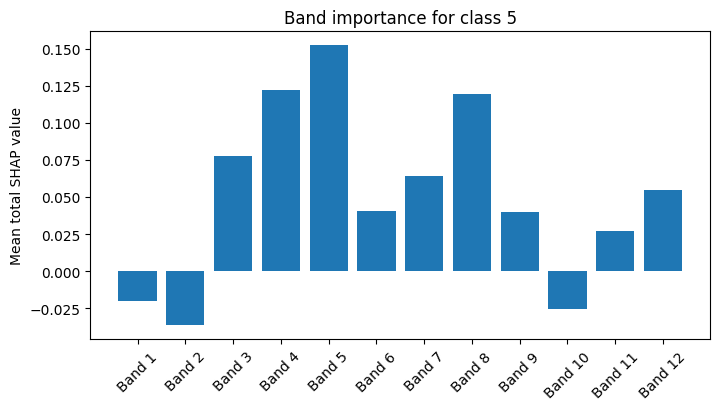

In [ ]:
print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()


/tmp/ipython-input-1309421875.py:24: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


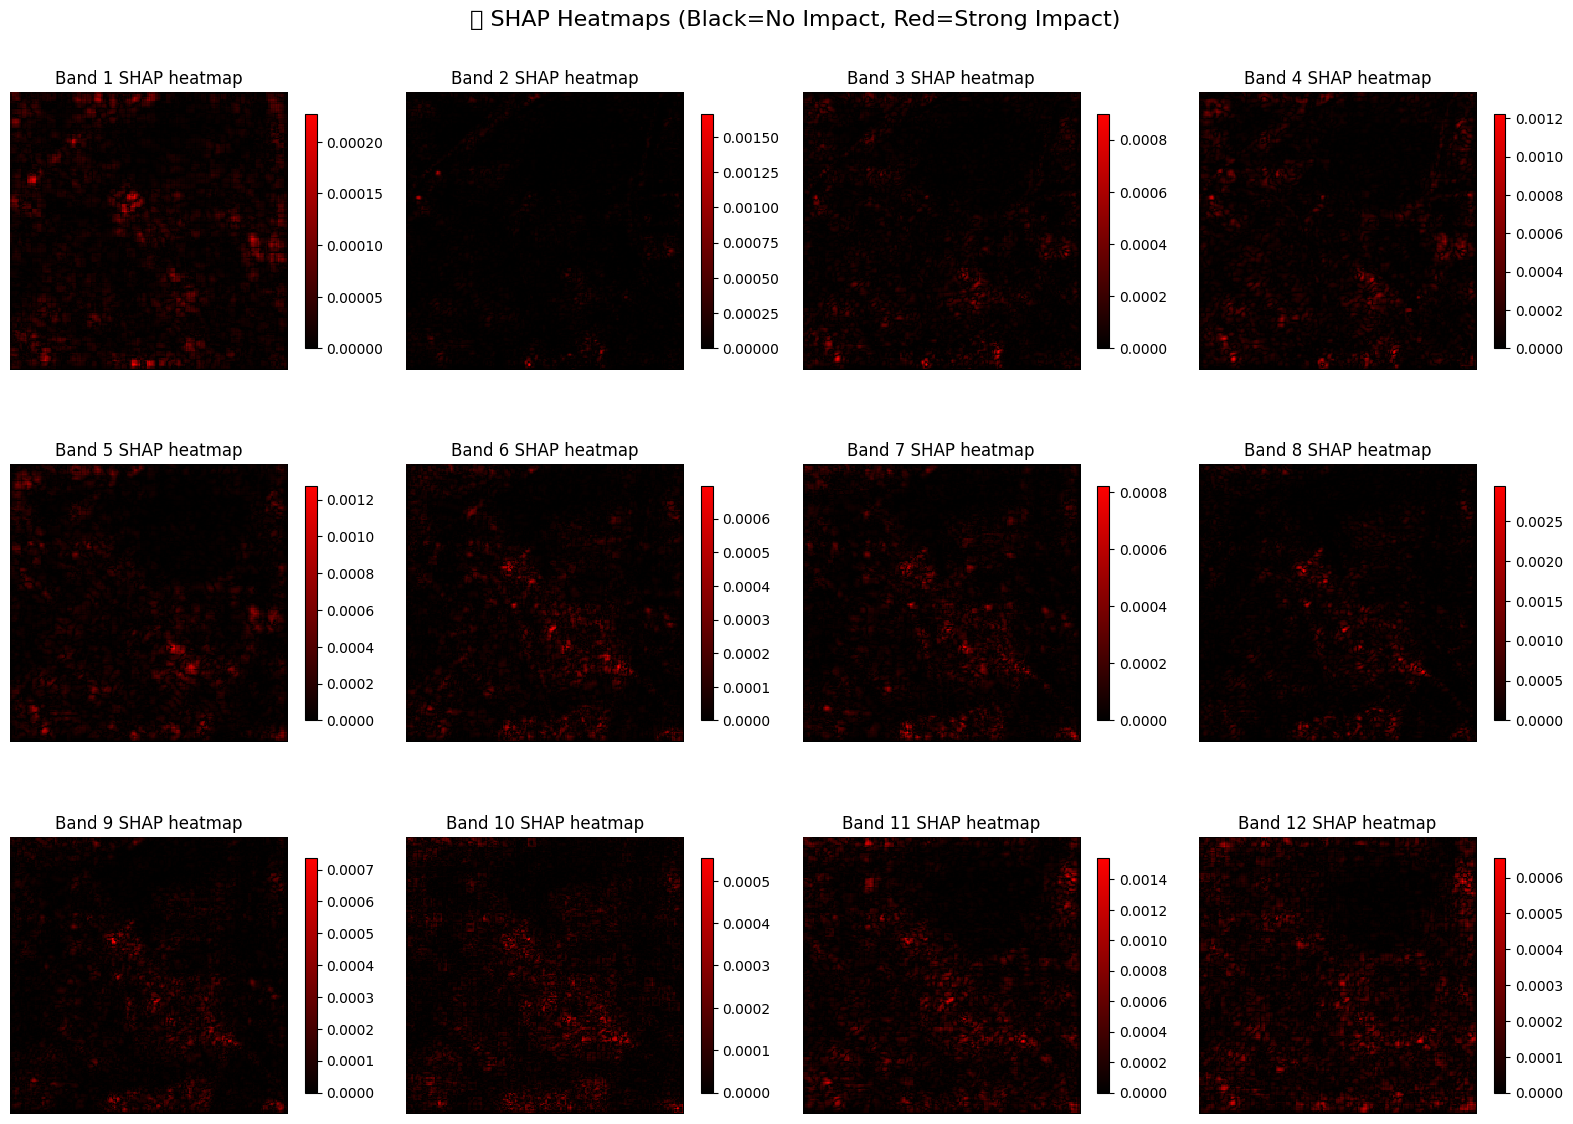

In [ ]:
import matplotlib.colors as mcolors

# Lấy array từ shap_values
shap_array = shap_values[0]  # shape: (12, H, W)

# Tạo custom colormap: black (0) -> red (high)
cmap = mcolors.LinearSegmentedColormap.from_list("black_red", ["black", "red"])

# Hiển thị heatmap cho từng band
num_bands = shap_array.shape[0]
fig, axes = plt.subplots(3, 4, figsize=(16, 12))  # 3 rows x 4 cols
axes = axes.flatten()

for i in range(num_bands):
    ax = axes[i]
    heatmap = np.abs(shap_array[i])  # lấy trị tuyệt đối cho impact

    im = ax.imshow(heatmap, cmap=cmap, interpolation='nearest')
    ax.set_title(f"Band {i+1} SHAP heatmap", fontsize=12)
    ax.axis('off')
    fig.colorbar(im, ax=ax, shrink=0.6)

plt.suptitle(" SHAP Heatmaps (Black=No Impact, Red=Strong Impact)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
# #  Tính tổng SHAP (giữ nguyên dấu) cho từng band
# total_shap_per_band = shap_array.sum(axis=(1, 2))  # shape (12,)

# #  In kết quả
# print(" Tổng SHAP value từng band:")
# for i, value in enumerate(total_shap_per_band, 1):
#     scalar_value = value.item() if np.ndim(value) == 0 else float(value)
#     print(f"Band {i}: {scalar_value:.4f}")

🔢 Tổng SHAP value từng band:
Band 1: 0.0323
Band 2: 0.0255
Band 3: 0.1662
Band 4: 0.1216
Band 5: 0.1458
Band 6: 0.0854
Band 7: -0.0108
Band 8: -0.0045
Band 9: -0.0201
Band 10: -0.0378
Band 11: 0.0656
Band 12: 0.0111


/tmp/ipython-input-886769093.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scalar_value = value.item() if np.ndim(value) == 0 else float(value)


In [ ]:
# Lấy giá trị lớn nhất & nhỏ nhất
max_value = np.argmax(mean_total_signed)
min_value = np.argmin(mean_total_signed)
print(max_value)
print(min_value)

(12, 224, 224, 1)
🔥 Band 3 có total SHAP cao nhất


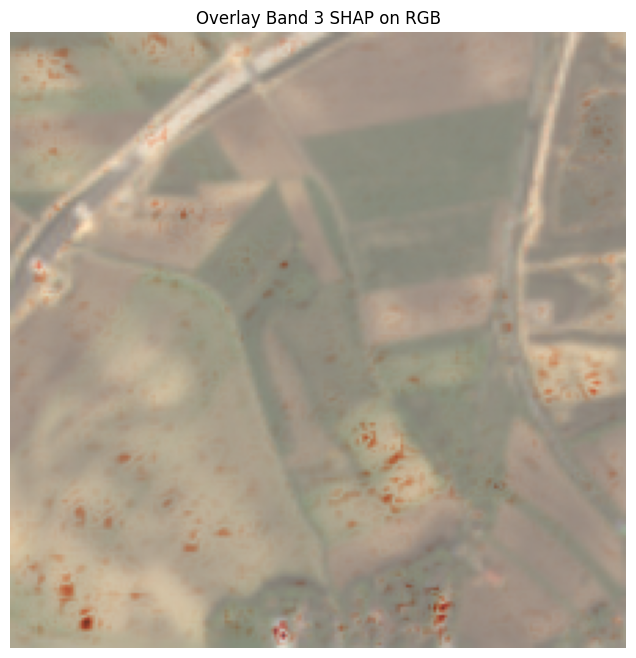

In [ ]:
#  Lấy ảnh gốc
image_np = test_imgs[0].cpu().numpy().transpose(1, 2, 0)  # (224, 224, 12)
rgb = image_np[:, :, [3, 2, 1]]  # Bands 4,3,2 (gần giống RGB)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # scale về [0,1]

#  Tìm band có mean |SHAP| cao nhất
print(shap_array.shape)
mean_shap_per_band = shap_array.sum(axis=(1, 2))  # shape (12,)
top_band_idx = np.argmax(mean_shap_per_band)
print(f"Band {top_band_idx+1} có total SHAP cao nhất")

# Lấy heatmap của band đó và scale
heatmap = np.abs(shap_array[top_band_idx])  # (H, W)
heatmap_norm = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-6)  # scale 0-1

# Overlay heatmap lên ảnh gốc
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.imshow(heatmap_norm, cmap="Reds", alpha=0.5)  # alpha=0.5 để thấy ảnh gốc
plt.axis('off')
plt.title(f"Overlay Band {top_band_idx+1} SHAP on RGB")
plt.show()


Mask and inference testset

In [ ]:
import torch
import numpy as np
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support, average_precision_score
)
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score,
    hamming_loss, accuracy_score, precision_score, recall_score,
    f1_score, jaccard_score, roc_curve, precision_recall_curve, auc
)

# Giả sử test_loader và model đã có sẵn
# Class 0 là "Arable land", tương ứng index = 0
# class_list là danh sách tên lớp theo thứ tự

def evaluate_model_mask_band8(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            # Mask toàn bộ band 8 (index 7 vì bắt đầu từ 0)
            images[:, max_value, :, :] = 0.0

            images = images.to(device)
            labels = labels.to(device)
            outputs = torch.sigmoid(model(images))

            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    y_true = np.vstack(all_labels)
    y_scores = np.vstack(all_preds)
    y_pred = (y_scores >= threshold).astype(int)

    return y_true, y_scores, y_pred

# === Chạy đánh giá ===
y_true, y_scores, y_pred = evaluate_model_mask_band8(model, test_loader, device)

# === Đánh giá riêng class 0 (Arable land) ===
class_idx = 5  # class "Arable land"

# Precision, Recall, F1 cho class 0
precision_0 = precision_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
recall_0 = recall_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
f1_0 = f1_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
support_0 = int(np.sum(y_true[:, class_idx]))

# === In kết quả ===
print(f"\nClass {class_idx} - {class_list[class_idx]}")
print(f"Precision: {precision_0:.2f}")
print(f"Recall:    {recall_0:.2f}")
print(f"F1-Score:  {f1_0:.2f}")
print(f"Support:   {support_0}")


Class 5 - Land principally occupied by agriculture, with significant areas of natural vegetation
Precision: 0.17
Recall:    1.00
F1-Score:  0.29
Support:   2555


In [ ]:
import torch
import numpy as np
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support, average_precision_score
)
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score,
    hamming_loss, accuracy_score, precision_score, recall_score,
    f1_score, jaccard_score, roc_curve, precision_recall_curve, auc
)

# Giả sử test_loader và model đã có sẵn
# Class 0 là "Arable land", tương ứng index = 0
# class_list là danh sách tên lớp theo thứ tự

def evaluate_model_mask_band8(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            # Mask toàn bộ band 8 (index 7 vì bắt đầu từ 0)
            images[:, min_value, :, :] = 0.0

            images = images.to(device)
            labels = labels.to(device)
            outputs = torch.sigmoid(model(images))

            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    y_true = np.vstack(all_labels)
    y_scores = np.vstack(all_preds)
    y_pred = (y_scores >= threshold).astype(int)

    return y_true, y_scores, y_pred

# === Chạy đánh giá ===
y_true, y_scores, y_pred = evaluate_model_mask_band8(model, test_loader, device)

# === Đánh giá riêng class 0 (Arable land) ===
class_idx = 5  # class "Arable land"

# Precision, Recall, F1 cho class 0
precision_0 = precision_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
recall_0 = recall_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
f1_0 = f1_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
support_0 = int(np.sum(y_true[:, class_idx]))

# === In kết quả ===
print(f"\nClass {class_idx} - {class_list[class_idx]}")
print(f"Precision: {precision_0:.2f}")
print(f"Recall:    {recall_0:.2f}")
print(f"F1-Score:  {f1_0:.2f}")
print(f"Support:   {support_0}")


Class 5 - Land principally occupied by agriculture, with significant areas of natural vegetation
Precision: 0.17
Recall:    1.00
F1-Score:  0.29
Support:   2555


Double


In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm
import random

model_path = "/content/drive/MyDrive/my_pytorch_model_bigearth_1.pth"
# Chọn device: ưu tiên GPU nếu có
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 6  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = self.base_model(x)
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs = []
num_needed = 150  # số lượng background cần lấy

for imgs, labels in test_loader:
    # labels shape: (batch_size, num_classes)
    # Kiểm tra xem ảnh nào trong batch có chứa class_idx (=1, kh chứa là =0)
    mask = labels[:, class_idx] == 0  # multi-label binary
    selected_imgs = imgs[mask]

    # Thêm các ảnh có chứa class_idx vào danh sách
    background_imgs.append(selected_imgs)

    # Kiểm tra đã đủ số lượng chưa
    total_found = sum(img.shape[0] for img in background_imgs)
    if total_found >= num_needed:
        break
# Nối lại thành tensor
background_imgs = torch.cat(background_imgs, dim=0)[:num_needed].to(device)

# Danh sách lưu index các ảnh mà model dự đoán có class_i
predicted_indices = []

#  Số lượng ảnh muốn explain
num_explain = 1000

print(f" Đang tìm {num_explain} ảnh mà model dự đoán có class {class_idx}...")

for idx in range(len(test_dataset)):
    img, _ = test_dataset[idx]
    img_batch = img.unsqueeze(0).to(device)  # thêm batch dim

    with torch.no_grad():
        prob = model(img_batch)[0, class_idx].item()
        pred = int(prob > 0.5)

    # Nếu model dự đoán class_i → thêm vào danh sách
    if pred == 1:
        predicted_indices.append(idx)
        print(f" Found at index {idx} (prob={prob:.3f})")

    # Dừng khi đủ số lượng
    if len(predicted_indices) >= num_explain:
        print(f" Đã tìm đủ {num_explain} ảnh.")
        break

#  Kiểm tra nếu không đủ số lượng
if len(predicted_indices) < num_explain:
    # raise ValueError(f" Chỉ tìm được {len(predicted_indices)} ảnh, không đủ {num_explain} để explain.")
    print(f"Chỉ tìm được {len(predicted_indices)} ảnh, sẽ tiếp tục với số lượng này.")

# Lấy các ảnh và labels để explain
test_imgs_list, test_labels_list = [], []
for idx in predicted_indices:
    img, label = test_dataset[idx]
    test_imgs_list.append(img.unsqueeze(0))  # thêm batch dim
    test_labels_list.append(label)

# Stack thành batch (num_explain, C, H, W)
test_imgs = torch.cat(test_imgs_list, dim=0).to(device)
test_labels = torch.stack(test_labels_list)

with torch.no_grad():
    probs = model(test_imgs)
    preds = (probs > 0.5).int()

# Hiển thị thông tin từng ảnh
for i in range(num_explain):
    print(f"Ảnh {i+1}:")
    print("  True labels:    ", test_labels_list[i].numpy())
    print("  Predicted probs:", np.round(probs[i].cpu().numpy(), 3))
    print("  Predicted labels:", preds[i].cpu().numpy())
    print(f"  Class {class_idx} probability: {probs[i, class_idx].item():.4f}\n")

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.

Ảnh 287:
  True labels:     [1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [0.998 0.095 0.139 0.003 0.024 0.925 0.531 0.224 0.816 0.011 0.    0.001
 0.001 0.005 0.001 0.    0.02  0.    0.   ]
  Predicted labels: [1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0]
  Class 6 probability: 0.5308

Ảnh 288:
  True labels:     [1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  Predicted probs: [0.37  0.78  0.336 0.04  0.258 0.143 0.675 0.641 0.94  0.015 0.    0.002
 0.002 0.008 0.004 0.002 0.201 0.    0.   ]
  Predicted labels: [0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
  Class 6 probability: 0.6754

Ảnh 289:
  True labels:     [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  Predicted probs: [0.093 0.001 0.001 0.008 0.002 0.229 0.732 0.296 0.066 0.    0.    0.005
 0.93  0.001 0.046 0.008 0.003 0.002 0.   ]
  Predicted labels: [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
  Class 6 probability: 0.7324



In [ ]:
print(shap_values.shape)  # (10, 12, 224, 224, 1)
shap_array = np.squeeze(shap_values)  # shape (10, 12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tổng SHAP theo từng band trên mỗi ảnh
total_shap = shap_array.sum(axis=(2, 3))  # shape (10, 12)

# Trung bình trên toàn bộ ảnh
mean_total_signed = total_shap.mean(axis=0)  # shape (12,)
print("mean_total_signed shape:", mean_total_signed.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_total_signed)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean total SHAP value')
plt.title(f'Band importance for class {class_idx}')
plt.show()


In [ ]:
import matplotlib.colors as mcolors

# Lấy array từ shap_values
shap_array = shap_values[0]  # shape: (12, H, W)

# Tạo custom colormap: black (0) -> red (high)
cmap = mcolors.LinearSegmentedColormap.from_list("black_red", ["black", "red"])

# Hiển thị heatmap cho từng band
num_bands = shap_array.shape[0]
fig, axes = plt.subplots(3, 4, figsize=(16, 12))  # 3 rows x 4 cols
axes = axes.flatten()

for i in range(num_bands):
    ax = axes[i]
    heatmap = np.abs(shap_array[i])  # lấy trị tuyệt đối cho impact

    im = ax.imshow(heatmap, cmap=cmap, interpolation='nearest')
    ax.set_title(f"Band {i+1} SHAP heatmap", fontsize=12)
    ax.axis('off')
    fig.colorbar(im, ax=ax, shrink=0.6)

plt.suptitle("🔥 SHAP Heatmaps (Black=No Impact, Red=Strong Impact)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
#  Tính tổng SHAP (giữ nguyên dấu) cho từng band
total_shap_per_band = shap_array.sum(axis=(1, 2))  # shape (12,)

#  In kết quả
print("Tổng SHAP value từng band:")
for i, value in enumerate(total_shap_per_band, 1):
    scalar_value = value.item() if np.ndim(value) == 0 else float(value)
    print(f"Band {i}: {scalar_value:.4f}")

In [ ]:
# Lấy giá trị lớn nhất & nhỏ nhất
max_value = np.max(total_shap_per_band)
min_value = np.min(total_shap_per_band)

In [ ]:
# Lấy ảnh gốc
image_np = test_imgs[0].cpu().numpy().transpose(1, 2, 0)  # (224, 224, 12)
rgb = image_np[:, :, [3, 2, 1]]  # Bands 4,3,2 (gần giống RGB)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # scale về [0,1]

# Tìm band có mean |SHAP| cao nhất
print(shap_array.shape)
mean_shap_per_band = shap_array.sum(axis=(1, 2))  # shape (12,)
top_band_idx = np.argmax(mean_shap_per_band)
print(f"Band {top_band_idx+1} có total SHAP cao nhất")

# Lấy heatmap của band đó và scale
heatmap = np.abs(shap_array[top_band_idx])  # (H, W)
heatmap_norm = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-6)  # scale 0-1

# Overlay heatmap lên ảnh gốc
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.imshow(heatmap_norm, cmap="Reds", alpha=0.5)  # alpha=0.5 để thấy ảnh gốc
plt.axis('off')
plt.title(f"Overlay Band {top_band_idx+1} SHAP on RGB")
plt.show()


In [ ]:
import torch
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def evaluate_model_mask_band(model, dataloader, device, mask_band_idx, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            # Mask band chỉ định (0 -> 11)
            images[:, mask_band_idx, :, :] = 0.0

            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    y_true = np.vstack(all_labels)
    y_scores = np.vstack(all_preds)
    y_pred = (y_scores >= threshold).astype(int)

    return y_true, y_scores, y_pred

# Danh sách tên class (tuỳ bạn sửa)
class_list = [
    "Arable land", "Permanent crops", "Pastures", "Forests", "Herbaceous vegetation",
    "Urban areas", "Bare land", "Water bodies", "Tundra", "Snow and ice",
    "Shrubland", "Wetlands", "Mangroves", "Salt flats", "Irrigated land",
    "Vineyards", "Orchards", "Rice fields", "Others"
]

# === Vòng lặp từng class ===
for class_idx in range(19):  # từ class 0 đến 18
    print(f"\n======= Evaluating Class {class_idx} - {class_list[class_idx]} =======")

    # Lặp qua từng band để mask
    for band_idx in range(12):  # mask từ band 0 đến 11
        y_true, y_scores, y_pred = evaluate_model_mask_band(model, test_loader, device, mask_band_idx=band_idx)

        precision = precision_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
        recall = recall_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
        f1 = f1_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
        support = int(np.sum(y_true[:, class_idx]))

        print(f"Band {band_idx} masked → Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}, Support: {support}")



======= Evaluating Class 0 - Arable land =======
Band 0 masked → Precision: 0.89, Recall: 0.85, F1: 0.87, Support: 6441
Band 1 masked → Precision: 0.89, Recall: 0.85, F1: 0.87, Support: 6441
Band 2 masked → Precision: 0.92, Recall: 0.78, F1: 0.84, Support: 6441
Band 3 masked → Precision: 0.92, Recall: 0.80, F1: 0.85, Support: 6441
Band 4 masked → Precision: 0.93, Recall: 0.74, F1: 0.83, Support: 6441
Band 5 masked → Precision: 0.88, Recall: 0.85, F1: 0.86, Support: 6441
Band 6 masked → Precision: 0.85, Recall: 0.82, F1: 0.84, Support: 6441
Band 7 masked → Precision: 0.87, Recall: 0.88, F1: 0.88, Support: 6441
Band 8 masked → Precision: 0.88, Recall: 0.88, F1: 0.88, Support: 6441
Band 9 masked → Precision: 0.91, Recall: 0.85, F1: 0.88, Support: 6441
Band 10 masked → Precision: 0.81, Recall: 0.80, F1: 0.80, Support: 6441
Band 11 masked → Precision: 0.91, Recall: 0.83, F1: 0.87, Support: 6441

======= Evaluating Class 1 - Permanent crops =======
Band 0 masked → Precision: 0.89, Recall: 0

In [ ]:
import torch
import numpy as np
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support, average_precision_score
)
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score,
    hamming_loss, accuracy_score, precision_score, recall_score,
    f1_score, jaccard_score, roc_curve, precision_recall_curve, auc
)

# Giả sử test_loader và model đã có sẵn
# Class 0 là "Arable land", tương ứng index = 0
# class_list là danh sách tên lớp theo thứ tự

def evaluate_model_mask_band8(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            # Mask toàn bộ band 8 (index 7 vì bắt đầu từ 0)
            images[:, min_value, :, :] = 0.0

            images = images.to(device)
            labels = labels.to(device)
            outputs = torch.sigmoid(model(images))

            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    y_true = np.vstack(all_labels)
    y_scores = np.vstack(all_preds)
    y_pred = (y_scores >= threshold).astype(int)

    return y_true, y_scores, y_pred

# === Chạy đánh giá ===
y_true, y_scores, y_pred = evaluate_model_mask_band8(model, test_loader, device)

# === Đánh giá riêng class 0 (Arable land) ===
class_idx = 6  # class "Arable land"

# Precision, Recall, F1 cho class 0
precision_0 = precision_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
recall_0 = recall_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
f1_0 = f1_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
support_0 = int(np.sum(y_true[:, class_idx]))

# === In kết quả ===
print(f"\nClass {class_idx} - {class_list[class_idx]}")
print(f"Precision: {precision_0:.2f}")
print(f"Recall:    {recall_0:.2f}")
print(f"F1-Score:  {f1_0:.2f}")
print(f"Support:   {support_0}")

In [ ]:
import os
os.kill(os.getpid(), 9)